# 01 - FastDup

This notebook shows how to quickly analyze an image dataset for potential issues using `fastdup`.   
By the end of this notebook you will learn how to find out if your dataset has issues such as:

+ Broken images.
+ Duplicates/near-duplicates.
+ Outliers.
+ Dark/bright/blurry images.

We'll also visualize clusters of visually similar looking images to let you have a birds eye view on your dataset.

## Import necessary libraries and download dataset

**NOTE:** `fastdup` sometimes has some compatibility issues with different platforms https://github.com/visual-layer/fastdup/issues/65

In [1]:
!pip install fastdup -Uq

Now, test the installation by printing out the version. If there's no error message, we are ready to go!

In [2]:
try:
    import google.colab

    IN_COLAB = True
except:
    IN_COLAB = False

IN_KAGGLE = "KAGGLE_KERNEL_RUN_TYPE" in os.environ

In [3]:
import sys
from pathlib import Path

import fastdup
from torchvision import datasets, transforms

if IN_COLAB or IN_KAGGLE:
    !git clone https://github.com/Digital-Dermatology/data-cleaning-hands-on.git
    sys.path.append("data-cleaning-hands-on")
else:
    sys.path.append("../")

from utils import get_oxford_pets3t, get_imagenette

fastdup.__version__

'1.100'

We start by downloading our dataset to analyze.   
**NOTE:** FastDup only requires the path to the images.

Either you want to analyze analyze Oxford PetIIIT:

In [4]:
dataset_name = "OxfordIIITPet"
data_path = Path("../data/") / dataset_name
_, df = get_oxford_pets3t(
    root_path=data_path, return_dataframe=True, transform=transforms.Resize((256, 256))
)
df.drop(columns=["label"], inplace=True)
df.rename(columns={"img_path": "filename", "label_name": "label"}, inplace=True)

Oxford PetIIIT already downloaded to `../data/OxfordIIITPet`.


or ImageNette:

In [5]:
# dataset_name = "ImageNette"
# data_path = Path("../data/")
# _, df = get_imagenette(
#    root_path=data_path, return_dataframe=True, transform=transforms.Resize((256, 256))
# )
# df.drop(columns=["label"], inplace=True)
# df.rename(columns={"img_path": "filename", "label_name": "label"}, inplace=True)

or your own collection:

In [6]:
# 2nd option -> analyze your own data
# dataset_name = "NameOfYourDataset"
# data_path = Path('path/to/dataset')

## Run `fastdup`

Once the extraction completes, we can run fastdup on the images.

For that let's create a `fastdup` object and specify the input directory which points to the folder of images.

In [7]:
fd = fastdup.create(
    input_dir=data_path, work_dir=f"../pre_computed_assets/FastDup/{dataset_name}"
)
fd.run(annotations=df)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2024-03-22 09:36:50 [INFO] Going to loop over dir /tmp/tmpva8smtaw.csv
2024-03-22 09:36:50 [INFO] Found total 7390 images to run on, 7390 train, 0 test, name list 7390, counter 7390 
2024-03-22 09:36:50 [ERROR] Failed to read image ../data/OxfordIIITPet/images/Abyssinian_34.jpg
2024-03-22 09:36:51 [ERROR] Failed to read image ../data/OxfordIIITPet/images/Egyptian_Mau_139.jpg
2024-03-22 09:36:51 [ERROR] Failed to read image ../data/OxfordIIITPet/images/Egyptian_Mau_145.jpg
2024-03-22 09:36:51 [ERROR] Failed to read image ../data/OxfordIIITPet/images/Egyptian_Mau_167.jpg
2024-03-22 09:36:51 [ERROR] Failed to read image ../data/OxfordIIITPet/images/Egyptian_Mau_177.jpg
2024-03-22 09:36:51 [ERROR] Failed to read image ../data/OxfordIIITPet/images/Egyptian_Mau_191.jpg
2024-03-22 09:37:00 [INFO] Found total 7390 images to run ontimated: 0 Minutes
2024-03-22 09:37:00 [INFO] 181) Finished write_index() NN model
2024-03-

0

## View Run Summary

In [8]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 7390 images
    Valid images are 99.92% (7,384) of the data, invalid are 0.08% (6) of the data
    For a detailed analysis, use `.invalid_instances()`.

    Similarity:  2.00% (148) belong to 3 similarity clusters (components).
    98.00% (7,242) images do not belong to any similarity cluster.
    Largest cluster has 12 (0.16%) images.
    For a detailed analysis, use `.connected_components()`
(similarity threshold used is 0.9, connected component threshold used is 0.96).

    Outliers: 6.14% (454) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 7390 images',
 'Valid images are 99.92% (7,384) of the data, invalid are 0.08% (6) of the data',
 'For a detailed analysis, use `.invalid_instances()`.\n',
 'Similarity:  2.00% (148) belong to 3 similarity clusters (components).',
 '98.00% (7,242) images do not belong to any similarity cluster.',
 'Largest cluster has 12 (0.16%) images.',
 'For a detailed analysis, use `.connected_components()`\n(similarity threshold used is 0.9, connected component threshold used is 0.96).\n',
 'Outliers: 6.14% (454) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

## Invalid Images
From the logs printed above, we see there are a few invalid images. These are broken images that cannot be read.

You can get a list of broken images with:

In [9]:
fd.invalid_instances()

,filename,label,index,error_code,filesize,is_valid,fd_index
136,../data/OxfordIIITPet/images/Abyssinian_34.jpg,Abyssinian,136,ERROR_CORRUPT_IMAGE,33705.0,False,136
1042,../data/OxfordIIITPet/images/Egyptian_Mau_139.jpg,Egyptian_Mau,1042,ERROR_CORRUPT_IMAGE,55860.0,False,1042
1049,../data/OxfordIIITPet/images/Egyptian_Mau_145.jpg,Egyptian_Mau,1049,ERROR_CORRUPT_IMAGE,27503.0,False,1049
1070,../data/OxfordIIITPet/images/Egyptian_Mau_167.jpg,Egyptian_Mau,1070,ERROR_CORRUPT_IMAGE,38606.0,False,1070
1079,../data/OxfordIIITPet/images/Egyptian_Mau_177.jpg,Egyptian_Mau,1079,ERROR_CORRUPT_IMAGE,24861.0,False,1079
1095,../data/OxfordIIITPet/images/Egyptian_Mau_191.jpg,Egyptian_Mau,1095,ERROR_CORRUPT_IMAGE,25550.0,False,1095


## Duplicate/Near-duplicates

One of the lowest hanging fruits in cleaning a dataset is finding and eliminating duplicates.

fastdup provides a handy way of visualizing duplicates/near-duplicates using the `duplicates_gallery` method. The `Distance` value indicates how visually similar are the image pairs in the gallery. A `Distance` of `1.0` indicates an exact copy and vice-versa.

/opt/conda/lib/python3.7/site-packages/fastdup/galleries.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))


Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored similarity visual view in  ../pre_computed_assets/FastDup/OxfordIIITPet/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



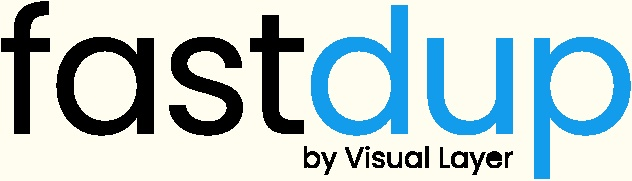
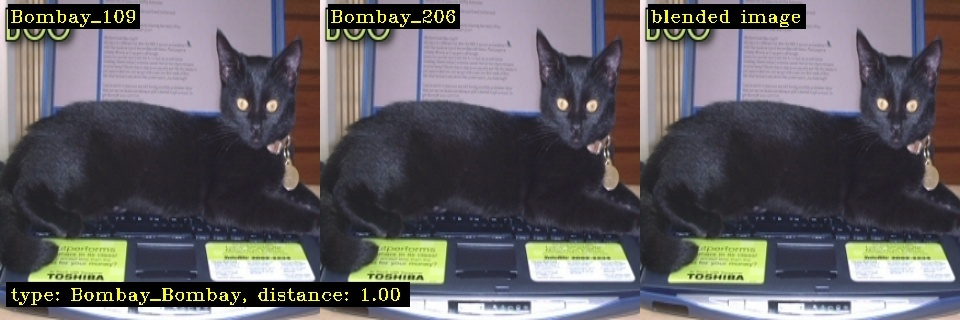
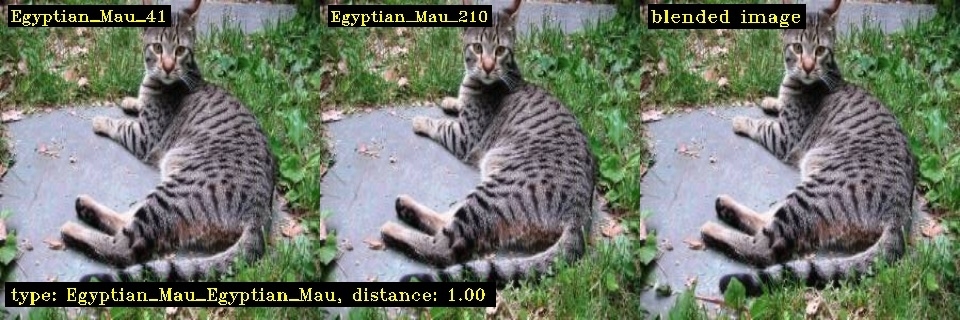
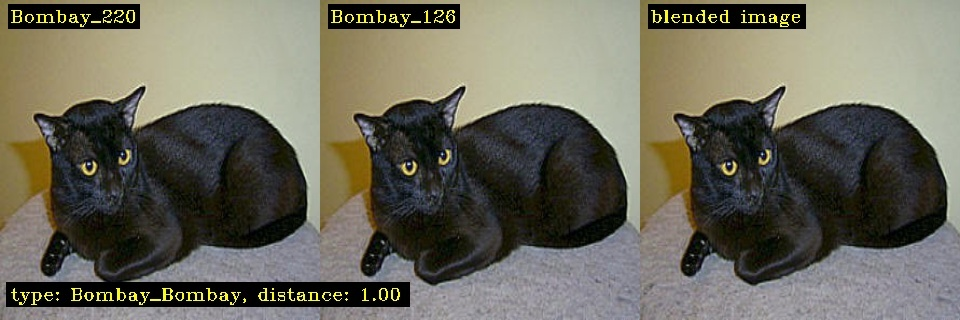
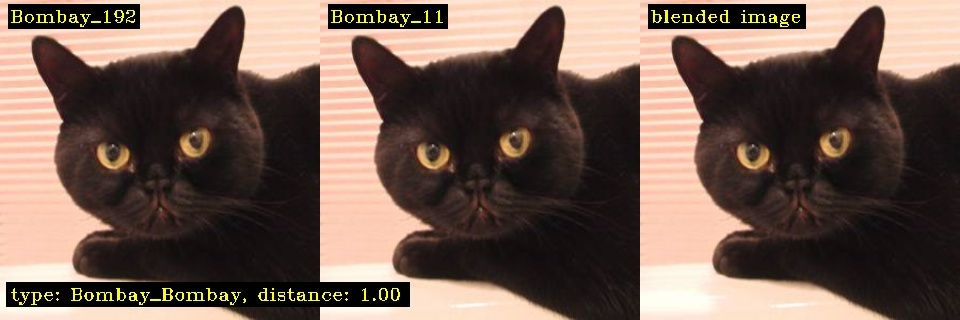
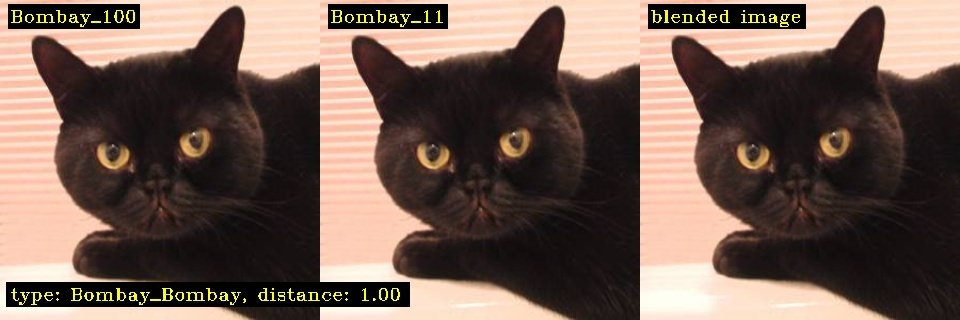

0

In [10]:
fd.vis.duplicates_gallery(num_images=5)

## Outliers

Similar to duplicate pairs, you can visualize potential outliers in your dataset with:

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored outliers visual view in  ../pre_computed_assets/FastDup/OxfordIIITPet/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



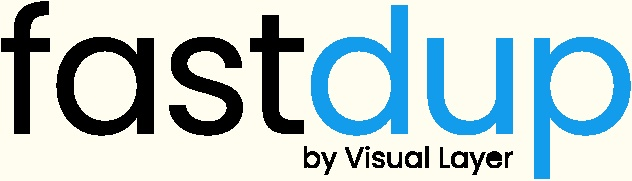
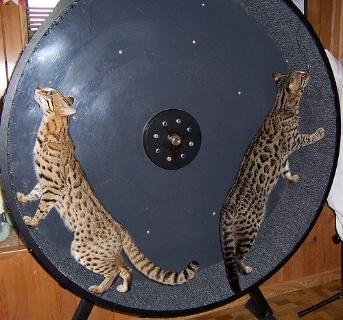
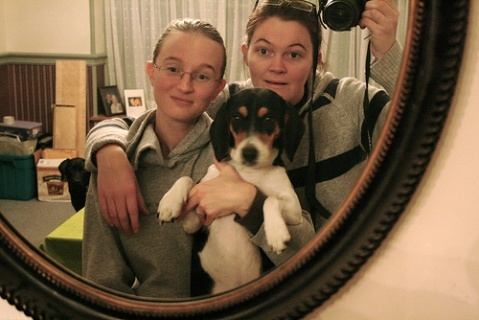
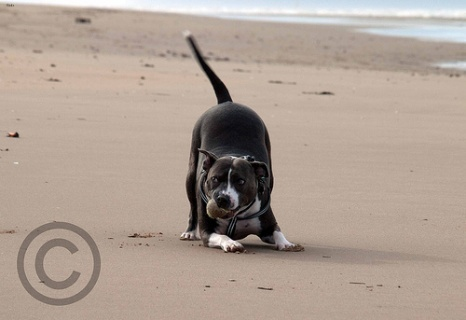
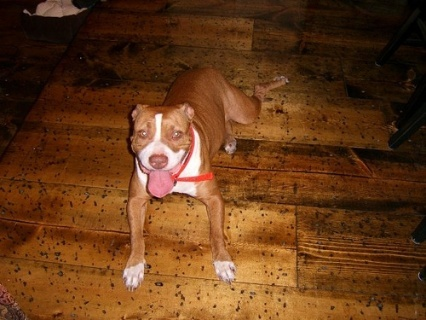
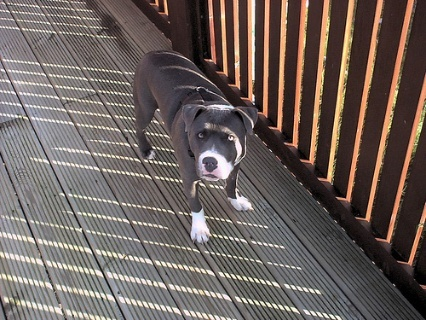

0

In [11]:
fd.vis.outliers_gallery(num_images=5)

## Dark, Bright and Blurry Images

fastdup also lets you visualize images from your dataset using statistical metrics.

For example, with `metric='dark'` we can visualize the darkest images from the dataset.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored mean visual view in  ../pre_computed_assets/FastDup/OxfordIIITPet/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



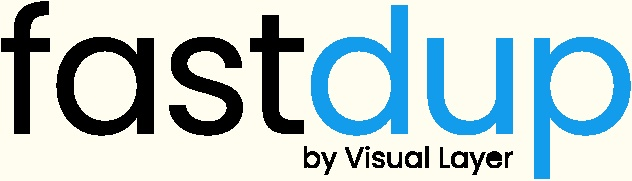
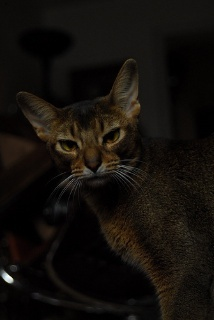
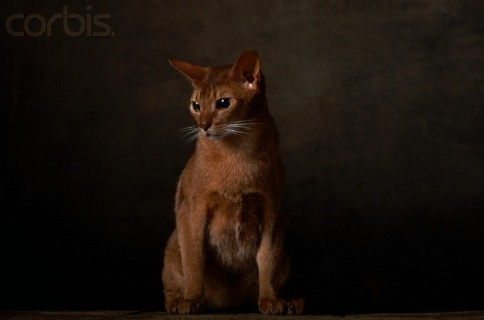
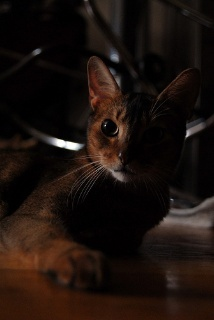
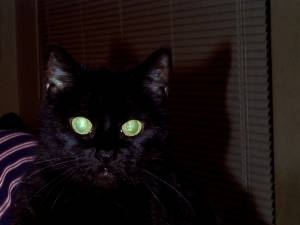
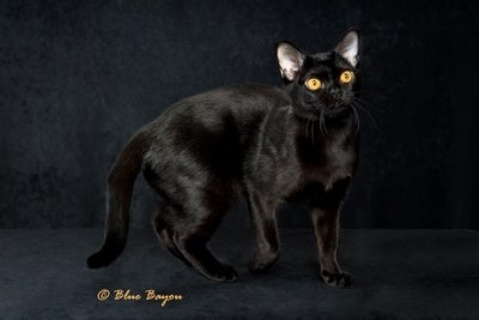

0

In [12]:
fd.vis.stats_gallery(metric="dark", num_images=5)

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored mean visual view in  ../pre_computed_assets/FastDup/OxfordIIITPet/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



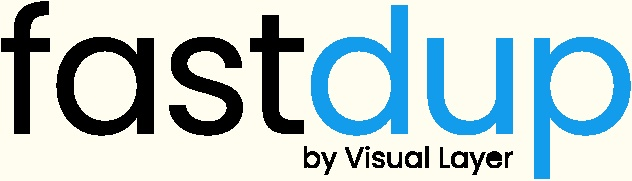
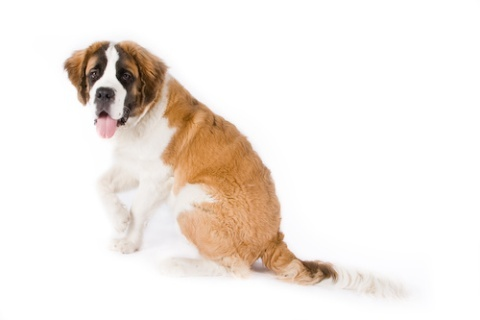
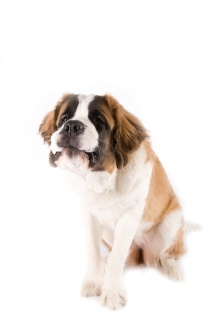
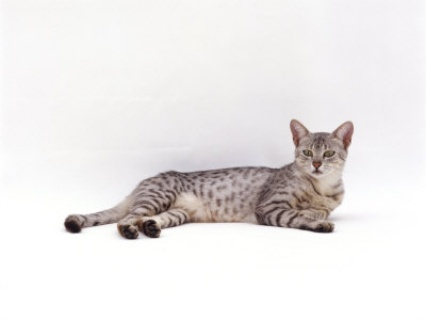
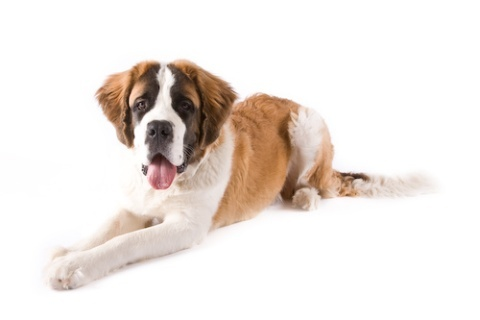
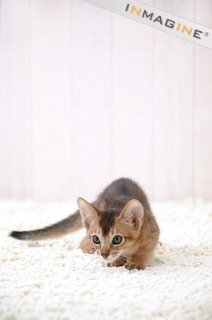

0

In [13]:
fd.vis.stats_gallery(metric="bright", num_images=5)

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored blur visual view in  ../pre_computed_assets/FastDup/OxfordIIITPet/galleries/blur.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



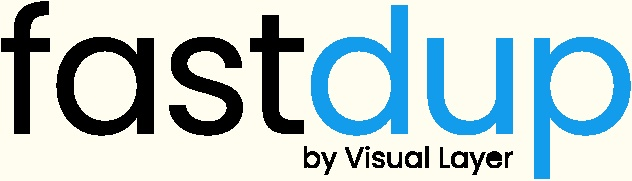
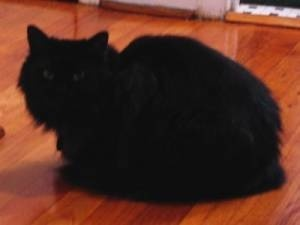
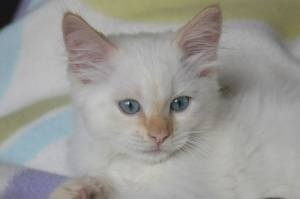
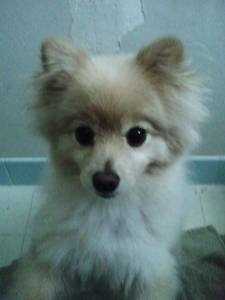
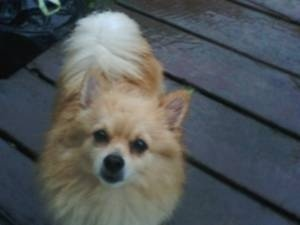
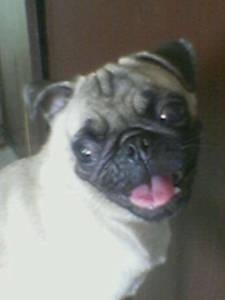

0

In [14]:
fd.vis.stats_gallery(metric="blur", num_images=5)

## Image Clusters

One of fastdup's coolest feature is visualizing image clusters. In the previous section we saw how to visualize similar image pairs. In this section we group similar looking image (or even duplicates) as a cluster and visualize them in gallery.

To do so, simply run:



> **Note**: fastdup uses default parameter values when creating image clusters. Depending on your data and use case, the best value may vary. Read more [here](https://visual-layer.readme.io/docs/dataset-cleanup) on how to change parameter values to cluster images.

Abyssinian


Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Finished OK. Components are stored as image files ../pre_computed_assets/FastDup/OxfordIIITPet/galleries/components_[index].jpg
Stored components visual view in  ../pre_computed_assets/FastDup/OxfordIIITPet/galleries/components.html
Execution time in seconds 0.7
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



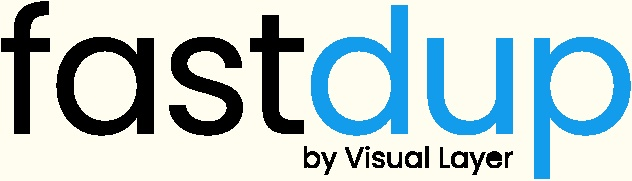
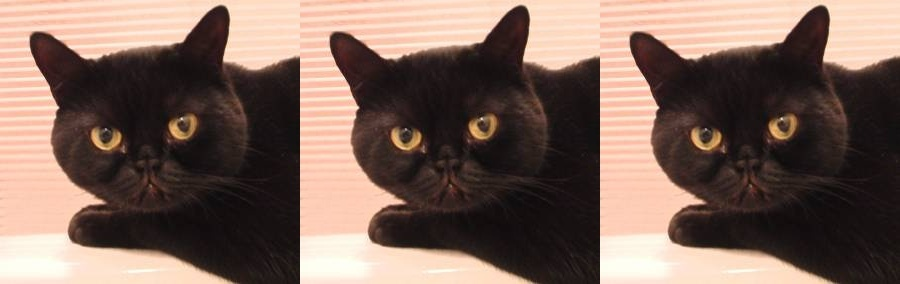
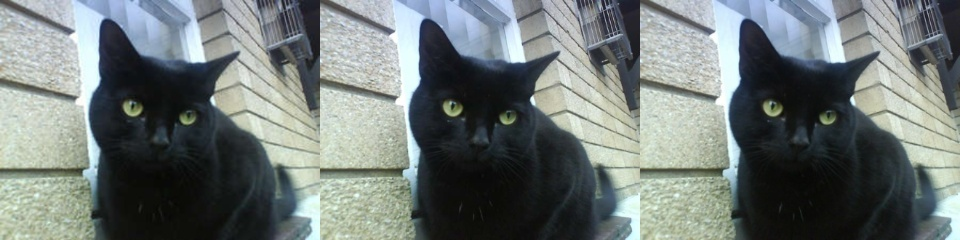
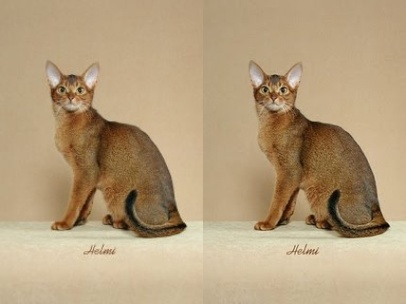
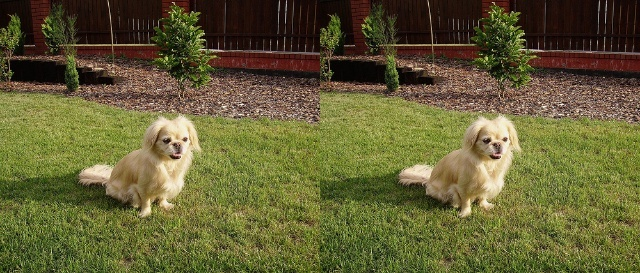
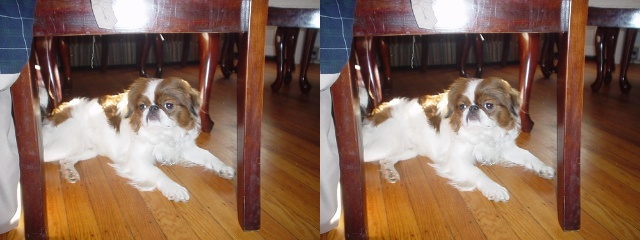

0

In [15]:
fd.vis.component_gallery(num_images=5)